In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
train1 = pd.read_csv('train.csv')
train1.head()

Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1         ...           B_following_count  \
0   0.362150                    2         ...                       29808   
1   5.176620                  369         ...                         848   
2   3.589718                   95         ...                         482   
3   2.830627                    6         ...                       17637   
4  23.861282                  551         ...                        1711   

   B_listed_count  B_mentions_received  B_retweets_received  B_mentions_sent  \
0            1689            15.430498             3.984029         8.204331   
1            1610            40.495021             8.943607         3.227677   
2             206             0.734696             0.354379         0.603202   
3             278           572.874855           390.293681        27.552040   
4             181            21.601866             3.581661         6.764657   

   B_retweets_sent    B_posts  B_network_feature_1  B_network_feature_2  \
0         0.332423   6.988815                   66            75.530303   
1         0.564343   1.070321                  163           132.030675   
2         0.100503   0.603202                    3            10.333333   
3         7.167557  32.101906                 1762            23.469296   
4         1.119727   4.563246                   85            48.500000   

   B_network_feature_3  
0          1916.893939  
1          2931.515337  
2           277.333333  
3          1395.845634  
4          1993.627907  

[5 rows x 23 columns]

In [3]:
choices = train1['Choice']
train1 = train1.drop('Choice', axis=1)

---

# Preprocessing



### Derive New Features

We have 11 features for A and the same 11 features for B. Since we are trying to predict if A > B, let's derive some new features by taking the difference (A - B) and ratio (A / B) between the original features of A and B.

In [4]:
train_dict = train1.to_dict()
train2 = train1.replace(0,0.01)

for i in range(0,11):
    colA = train2.columns[i]
    colB = train2.columns[i+11]
    diff_col = train2[colA] - train2[colB]
    ratio_col = train2[colA] / train2[colB]
    train_dict[colA + ' - ' + colB] = diff_col
    train_dict[colA + ':' + colB] = ratio_col

train2 = pd.DataFrame(train_dict)
train2.describe()

A_follower_count  A_follower_count - B_follower_count  \
count      5.500000e+03                         5.500000e+03   
mean       6.498840e+05                        -3.560291e+04   
std        2.028787e+06                         2.724394e+06   
min        1.600000e+01                        -3.619107e+07   
25%        2.663750e+03                        -1.838008e+05   
50%        4.558900e+04                         1.500000e+01   
75%        3.927380e+05                         1.779708e+05   
max        3.654319e+07                         3.506800e+07   

       A_follower_count:B_follower_count  A_following_count  \
count                        5500.000000       5.500000e+03   
mean                          609.063937       1.265895e+04   
std                          9180.138456       4.900867e+04   
min                             0.000004       0.000000e+00   
25%                             0.062139       3.220000e+02   
50%                             1.014562       7.780000e+02   
75%                            17.551299       2.838000e+03   
max                        477141.000000       1.165830e+06   

       A_following_count - B_following_count  \
count                           5.500000e+03   
mean                           -7.931036e+01   
std                             7.043435e+04   
min                            -6.643230e+05   
25%                            -1.384750e+03   
50%                             1.600000e+01   
75%                             1.501000e+03   
max                             1.162212e+06   

       A_following_count:B_following_count  A_listed_count  \
count                         5.500000e+03     5500.000000   
mean                          4.438566e+03     5952.453273   
std                           1.239164e+05    17339.141191   
min                           3.619896e-08        0.000000   
25%                           1.791136e-01       85.000000   
50%                           1.039476e+00      932.000000   
75%                           5.938035e+00     6734.000000   
max                           5.657100e+06   549144.000000   

       A_listed_count - B_listed_count  A_listed_count:B_listed_count  \
count                      5500.000000                   5.500000e+03   
mean                         49.304935                   3.500537e+03   
std                       21248.786102                   7.800600e+04   
min                     -544716.000000                   2.602472e-07   
25%                       -3477.250000                   8.204292e-02   
50%                           5.995000                   1.075984e+00   
75%                        3638.500000                   1.316297e+01   
max                      518386.000000                   3.062200e+06   

       A_mentions_received       ...         B_following_count  \
count         5.500000e+03       ...               5500.000000   
mean          2.666032e+03       ...              12738.259818   
std           2.916543e+04       ...              50054.520874   
min           1.005034e-01       ...                  0.000000   
25%           3.453649e+00       ...                322.000000   
50%           4.876542e+01       ...                773.000000   
75%           3.498196e+02       ...               2838.000000   
max           1.145219e+06       ...             664324.000000   

       B_listed_count  B_mentions_received  B_mentions_sent  \
count     5500.000000         5.500000e+03      5500.000000   
mean      5903.148364         2.554598e+03         6.099658   
std      16298.462018         2.508873e+04         9.729557   
min          0.000000         1.005034e-01         0.100503   
25%         75.000000         3.260473e+00         0.356943   
50%        890.000000         4.876542e+01         2.251398   
75%       6734.000000         3.743699e+02         6.866840   
max     549144.000000         1.145219e+06        76.809514   

       B_network_feature_1  B_network_feature_2  

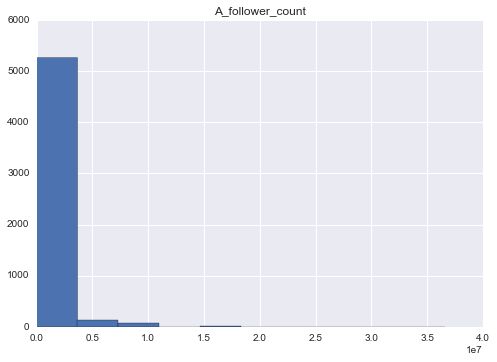

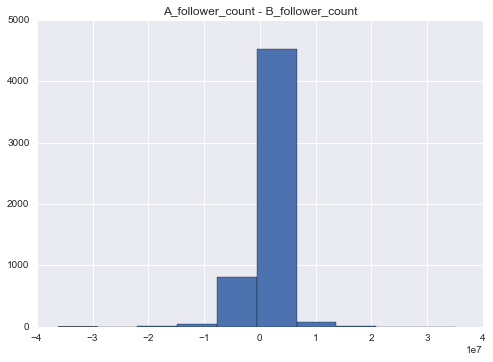

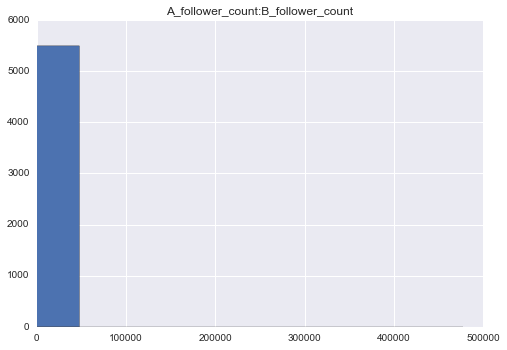

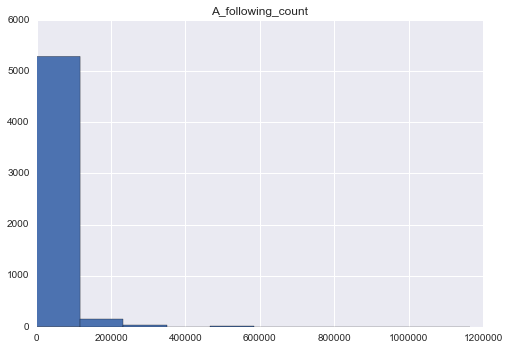

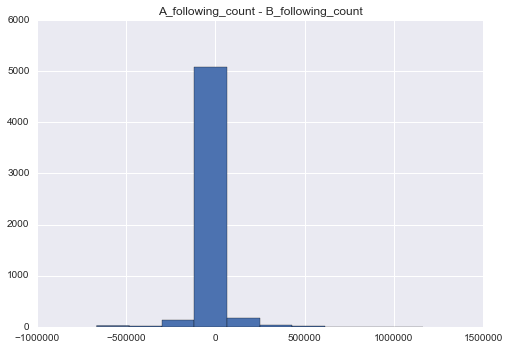

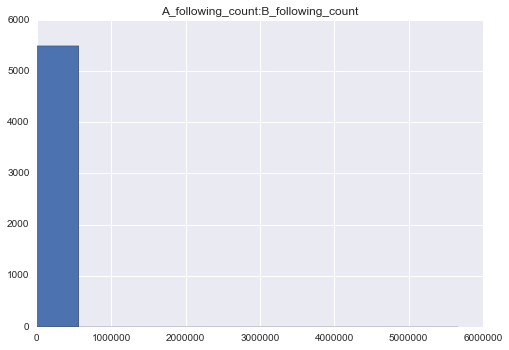

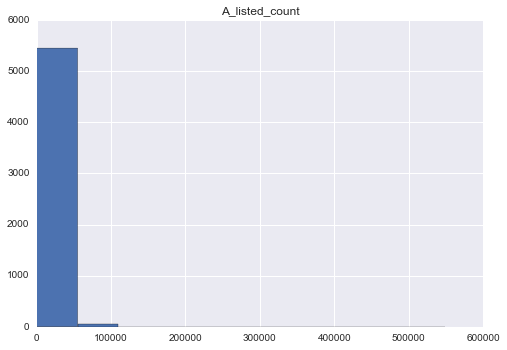

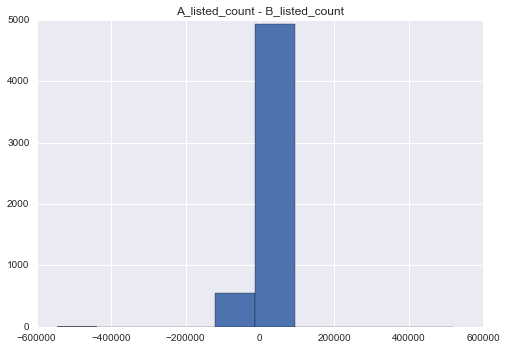

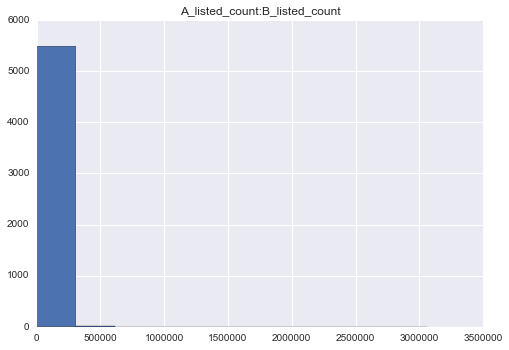

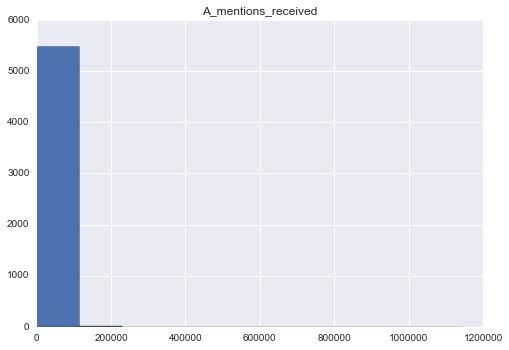

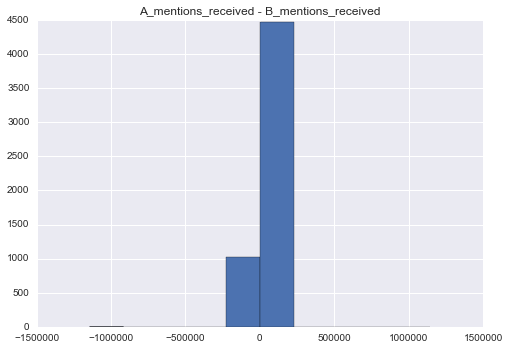

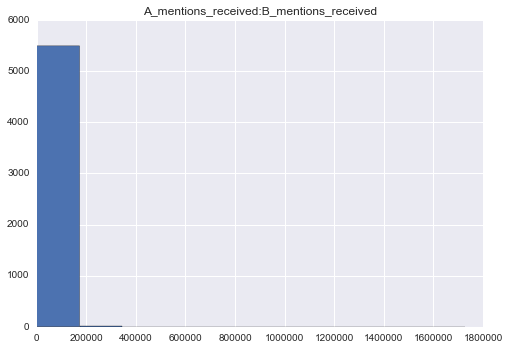

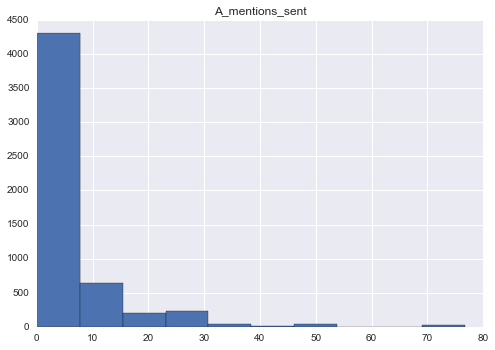

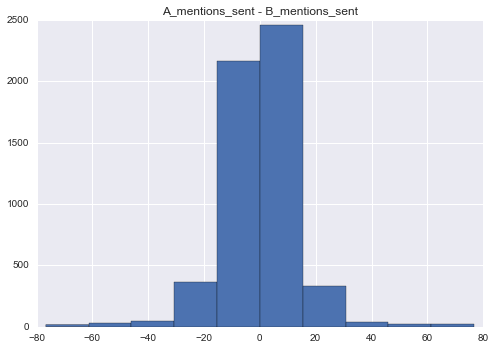

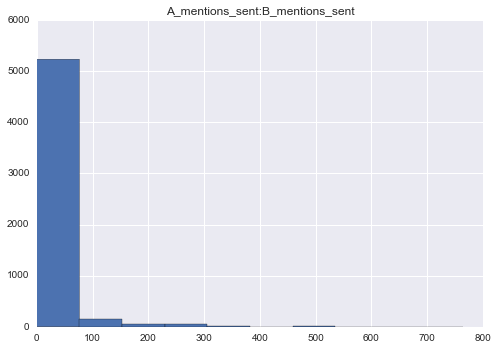

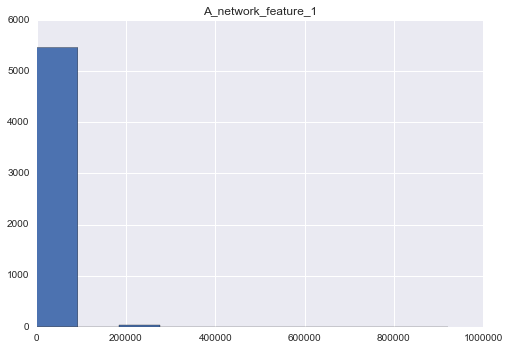

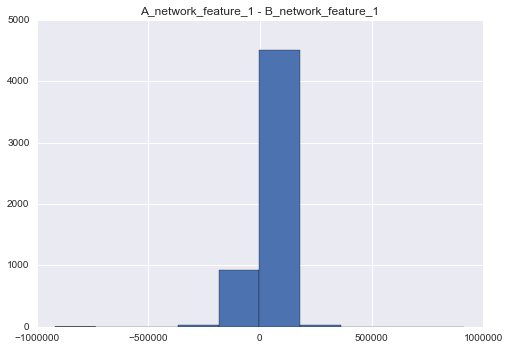

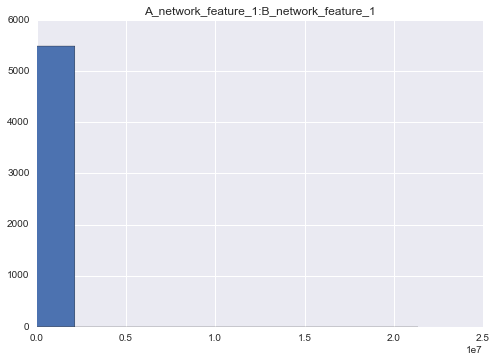

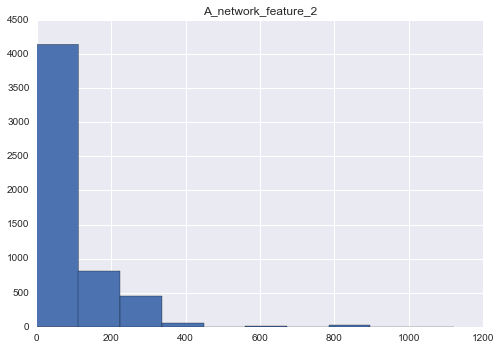

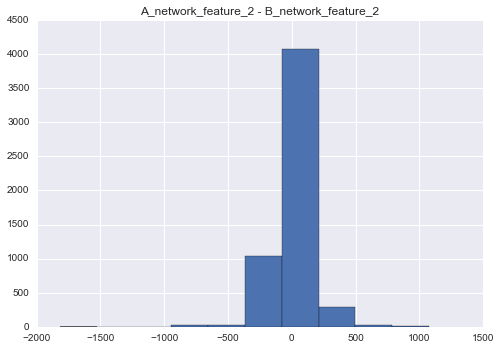

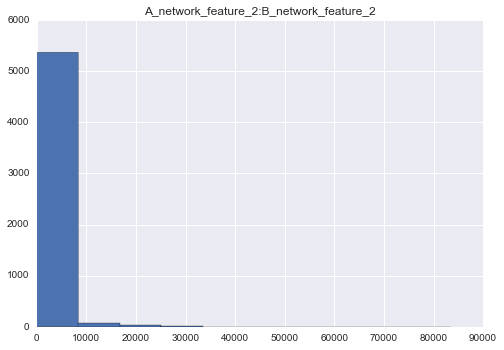

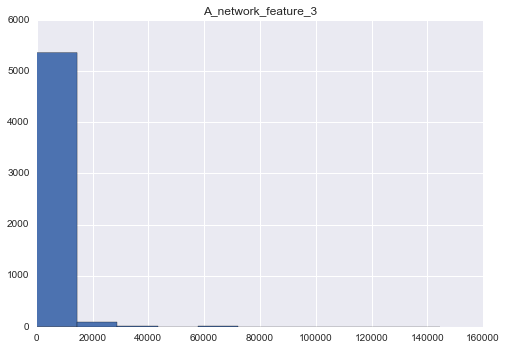

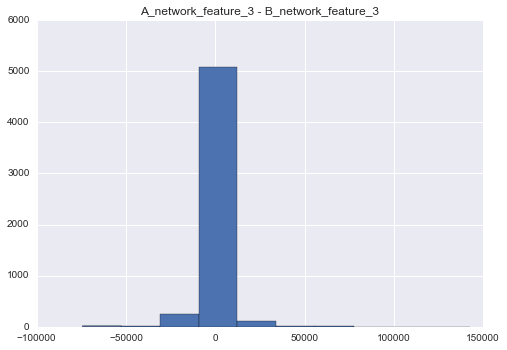

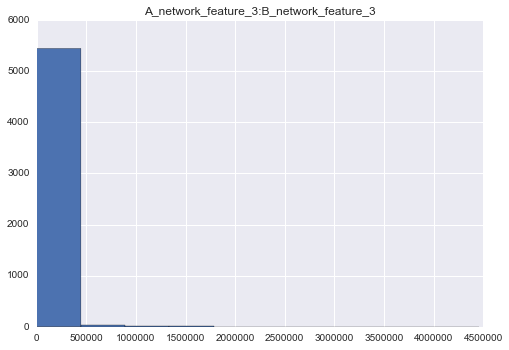

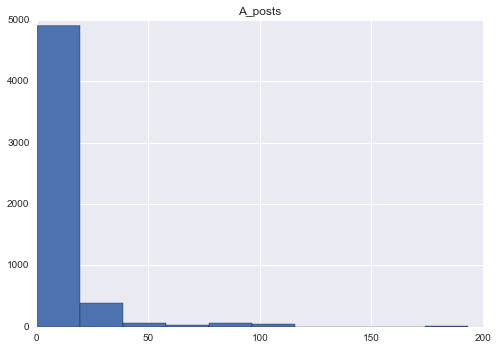

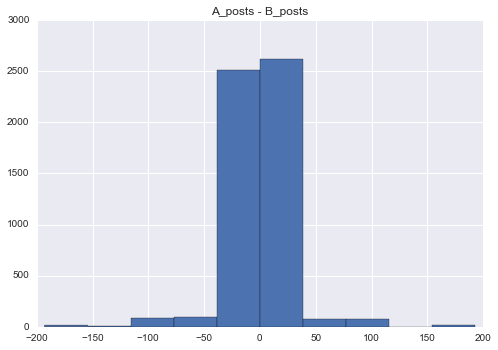

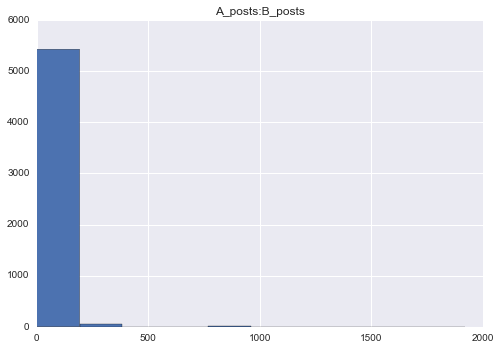

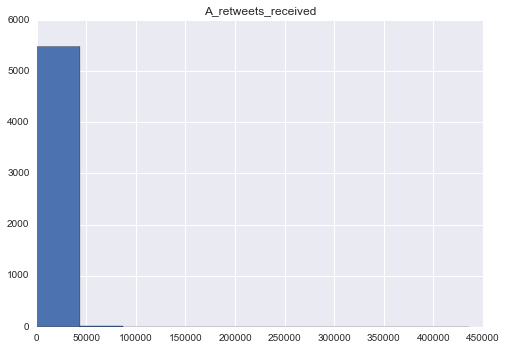

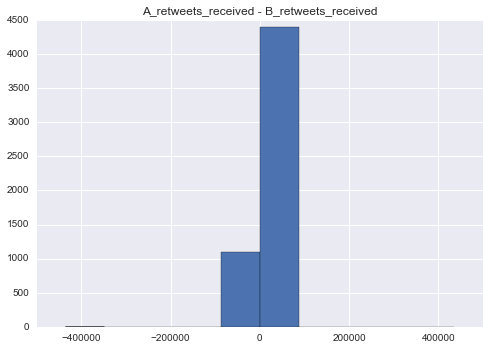

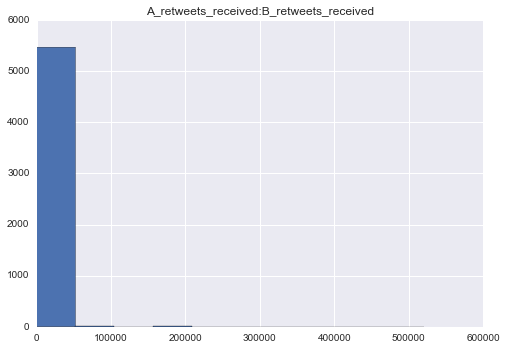

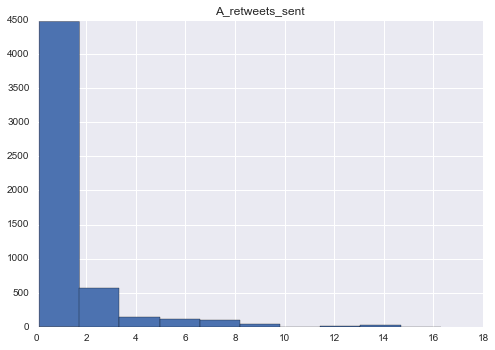

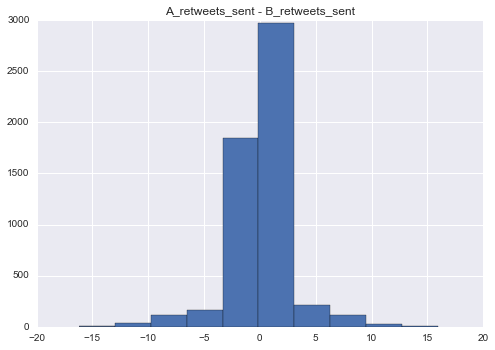

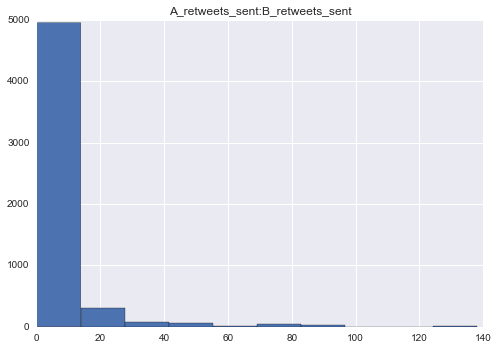

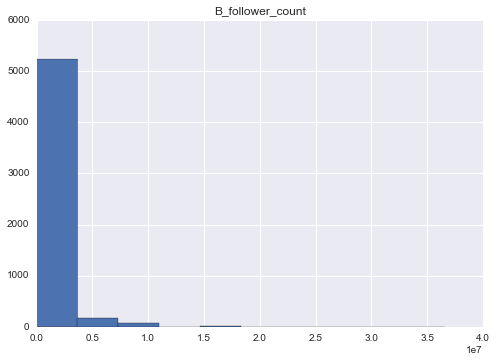

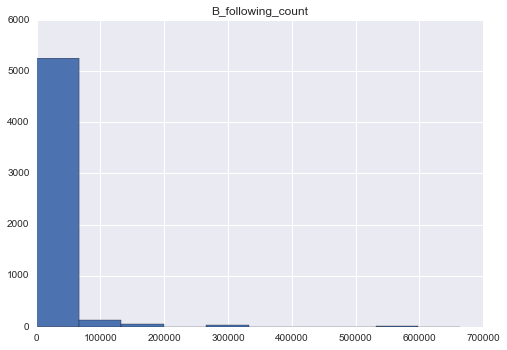

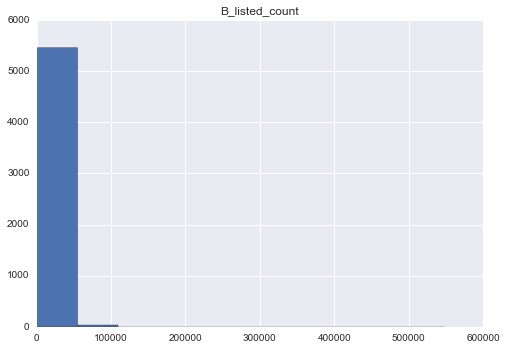

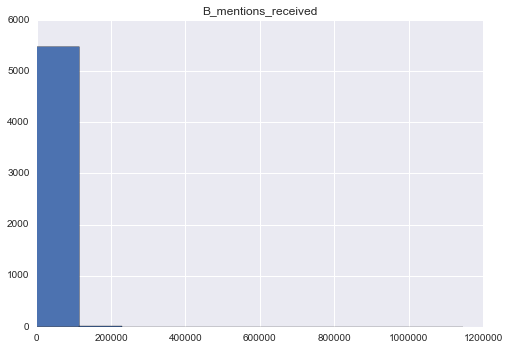

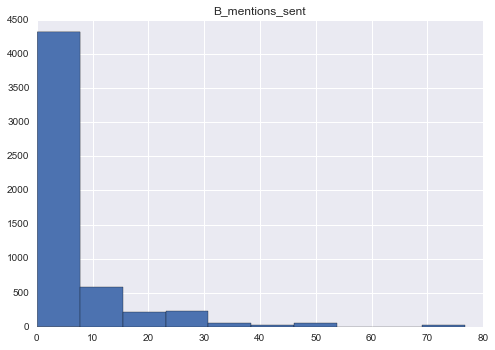

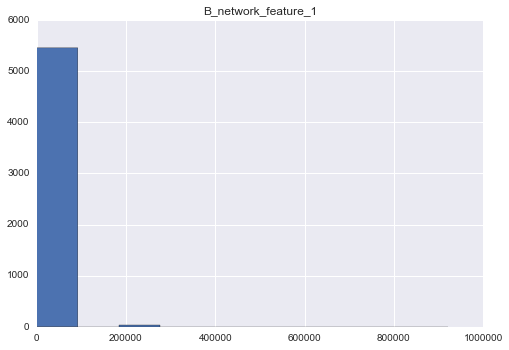

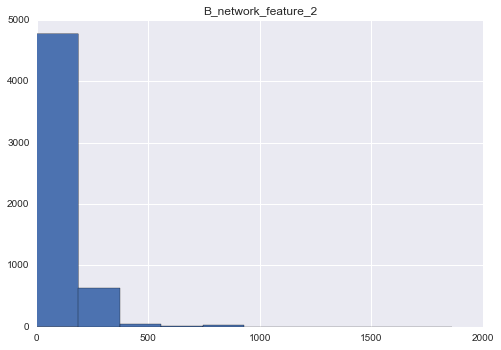

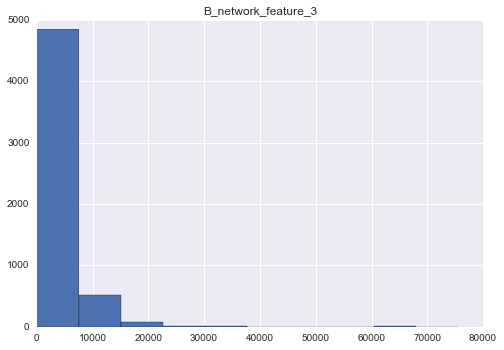

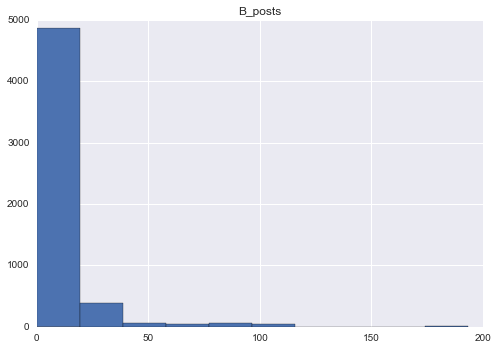

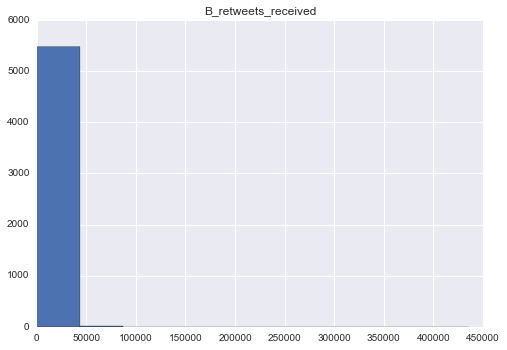

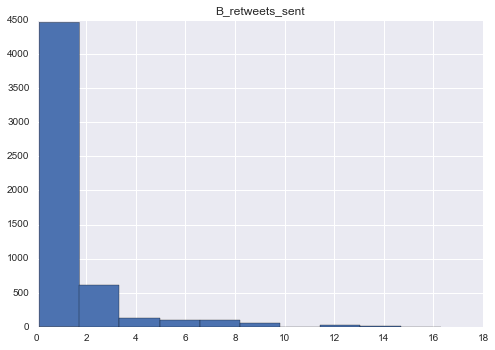

In [5]:
# Plot histograms for each feature
for column in train2.columns:
    train2[column].hist()
    plt.title(column)
    plt.show()

### Log Transform
A lot of our features seem to be skewed pretty heavily. Let's try a log transformation of these features to make their distributions look more normal.

Note: Features representing the difference between A and B (A - B Features) will not be transformed since a large amount of their values are negative

In [6]:
train2.columns

Index([u'A_follower_count', u'A_follower_count - B_follower_count',
       u'A_follower_count:B_follower_count', u'A_following_count',
       u'A_following_count - B_following_count',
       u'A_following_count:B_following_count', u'A_listed_count',
       u'A_listed_count - B_listed_count', u'A_listed_count:B_listed_count',
       u'A_mentions_received', u'A_mentions_received - B_mentions_received',
       u'A_mentions_received:B_mentions_received', u'A_mentions_sent',
       u'A_mentions_sent - B_mentions_sent',
       u'A_mentions_sent:B_mentions_sent', u'A_network_feature_1',
       u'A_network_feature_1 - B_network_feature_1',
       u'A_network_feature_1:B_network_feature_1', u'A_network_feature_2',
       u'A_network_feature_2 - B_network_feature_2',
       u'A_network_feature_2:B_network_feature_2', u'A_network_feature_3',
       u'A_network_feature_3 - B_network_feature_3',
       u'A_network_feature_3:B_network_feature_3', u'A_posts',
       u'A_posts - B_posts', u'A_posts:B_

In [7]:
train3 = train2

for i in range(0,33,3):
    col = train3.columns[i]
    train3[col] = train3[col].replace(0,.01)
    train3[col] = np.log(train3[col])

for i in range(2,33,3):
    col = train3.columns[i]
    train3[col] = train3[col].replace(0,.01)
    train3[col] = np.log(train3[col])

for i in range(33, len(train3.columns)):
    col = train3.columns[i]
    train3[col] = train3[col].replace(0,.01)
    train3[col] = np.log(train3[col])

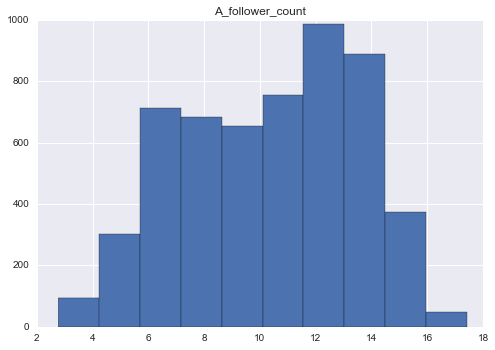

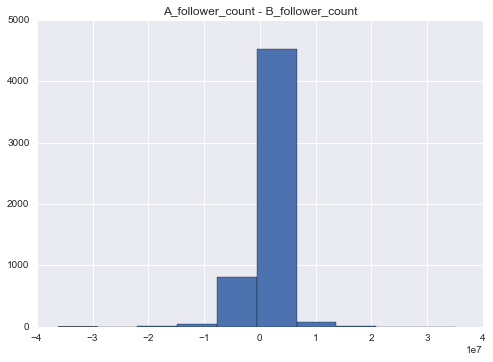

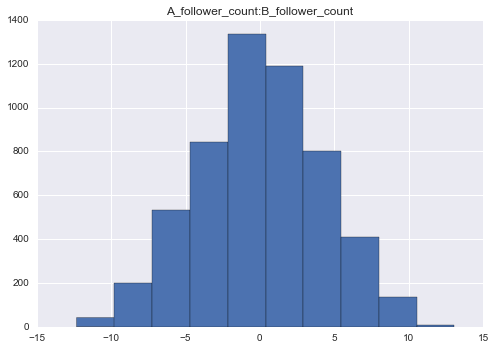

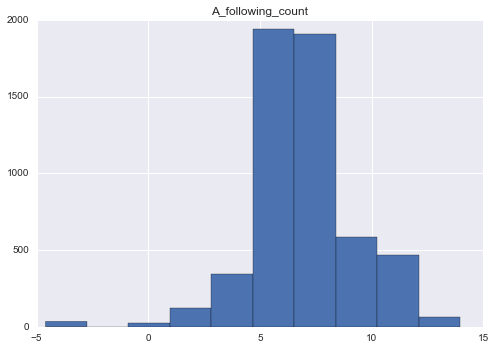

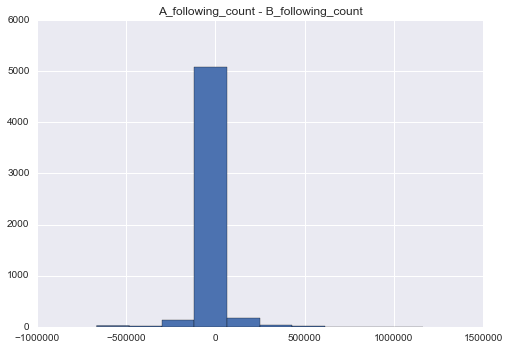

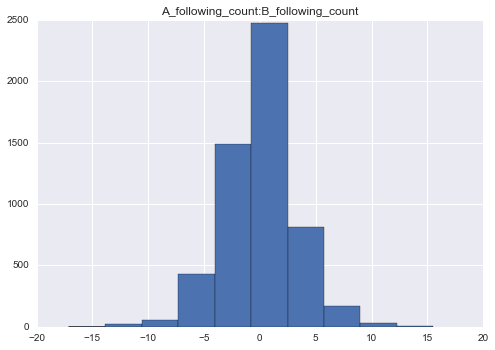

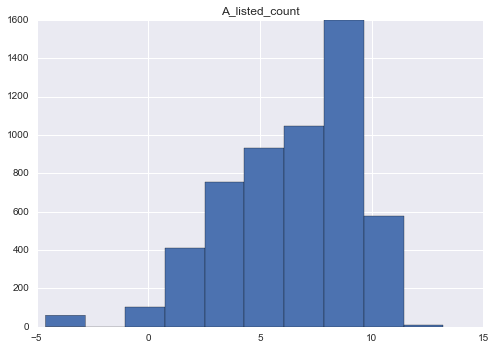

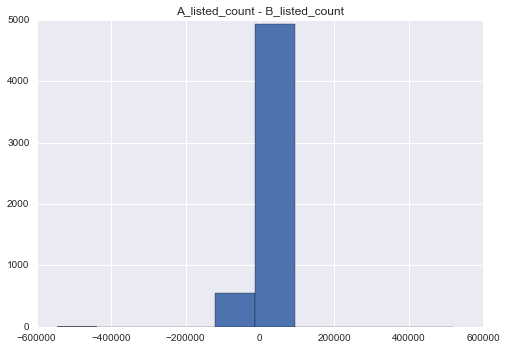

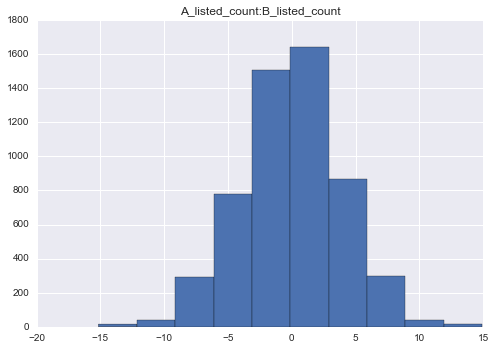

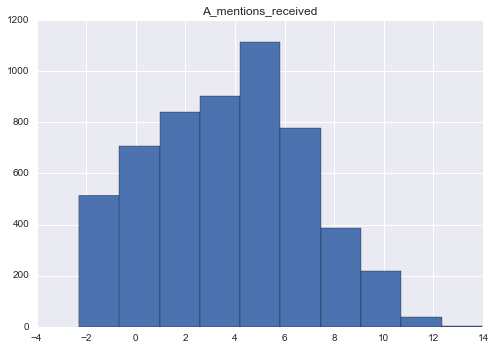

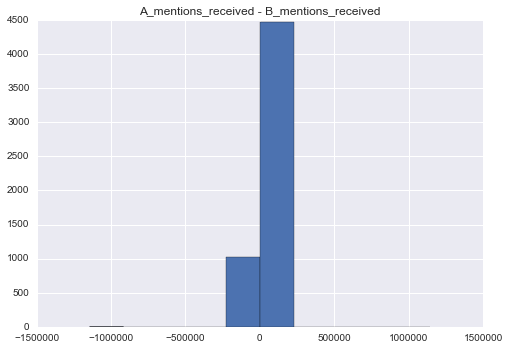

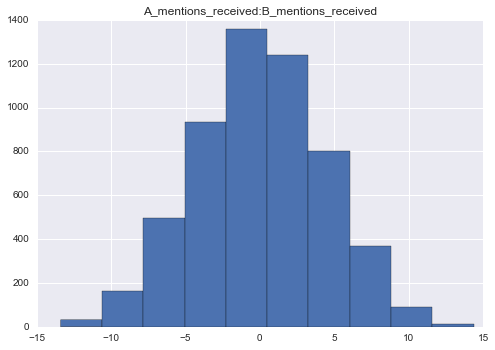

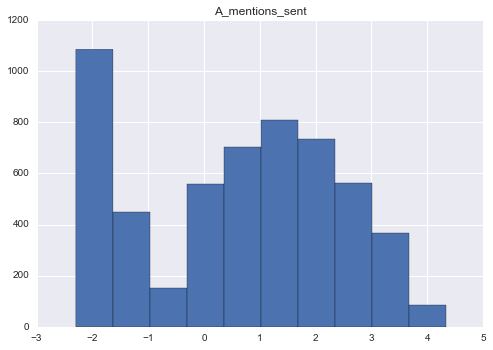

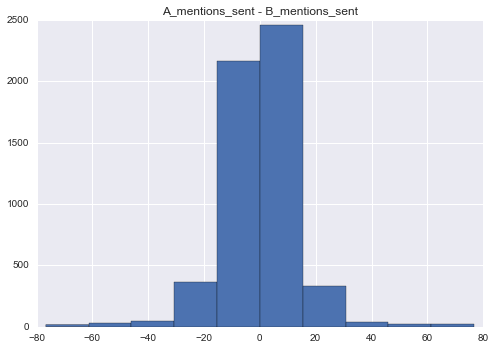

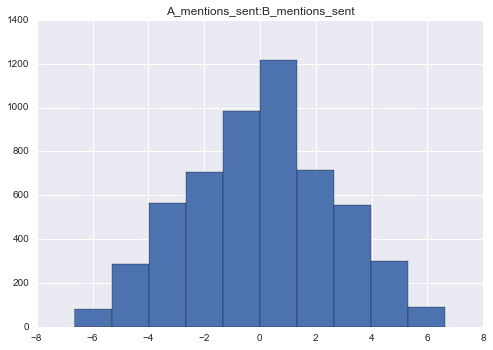

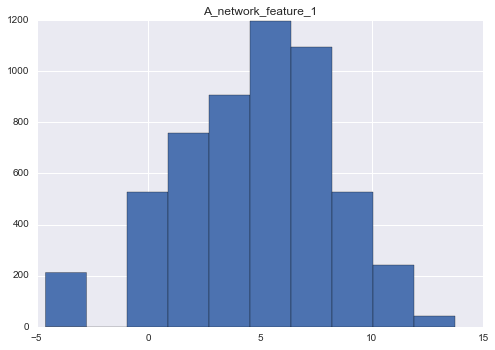

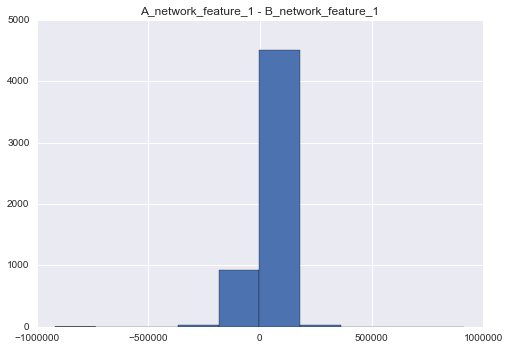

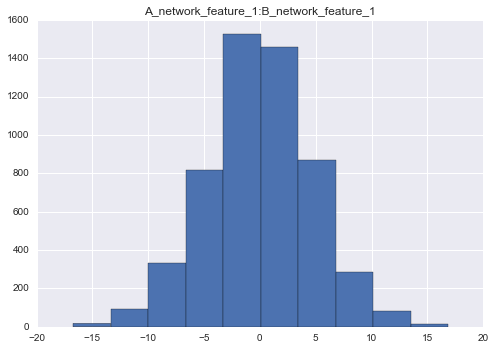

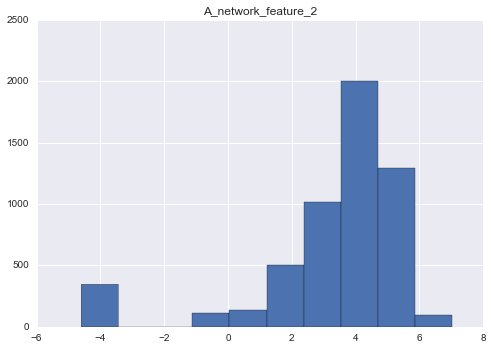

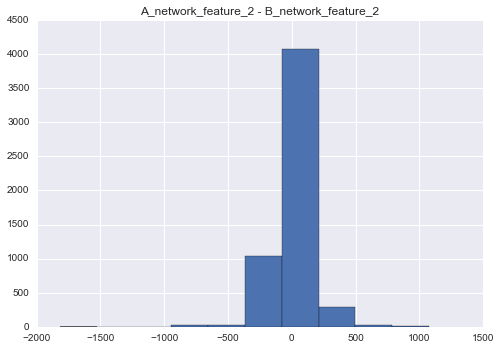

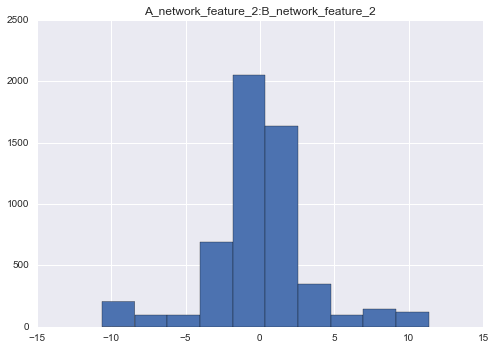

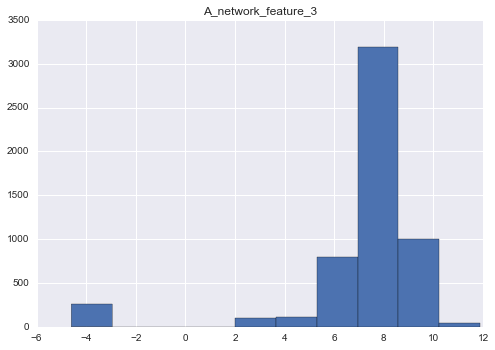

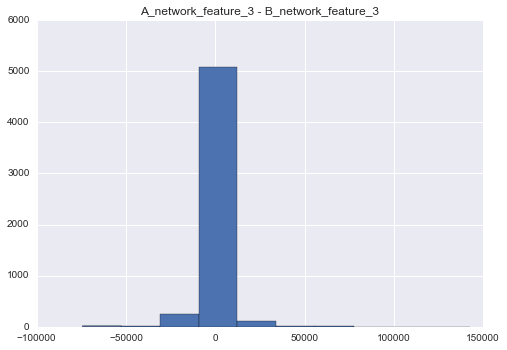

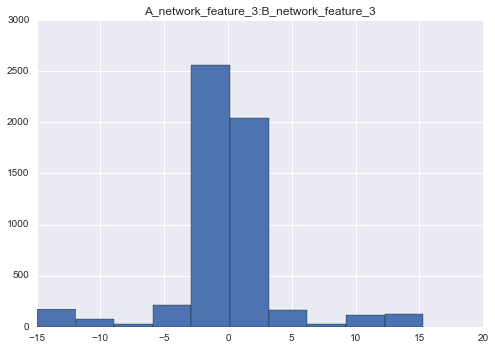

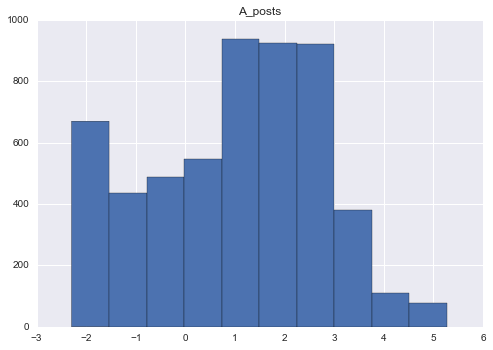

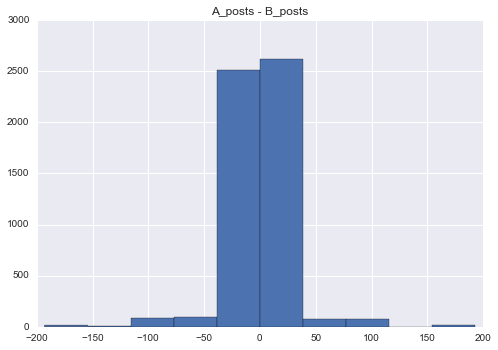

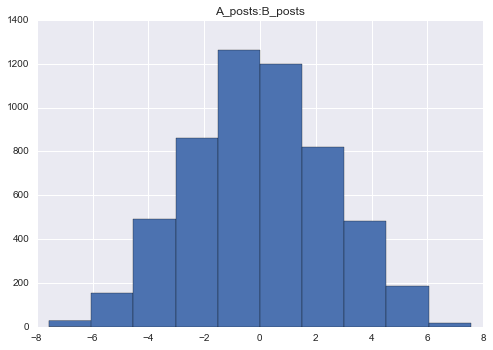

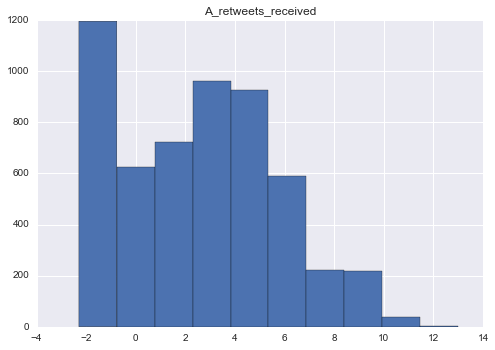

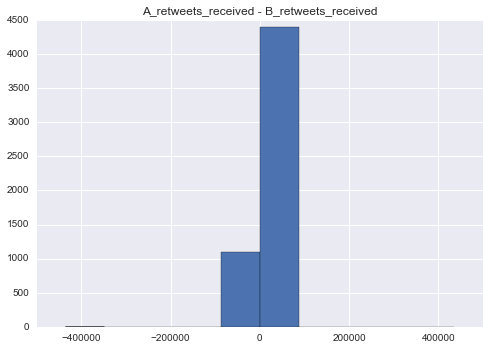

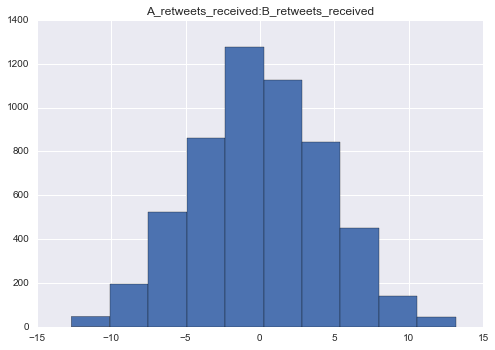

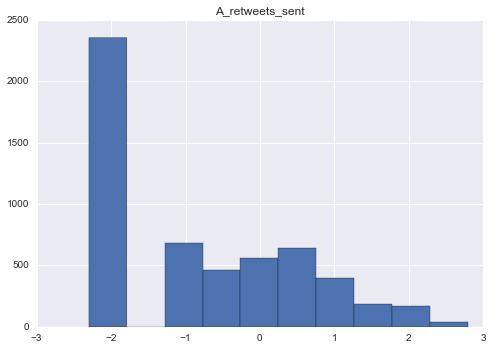

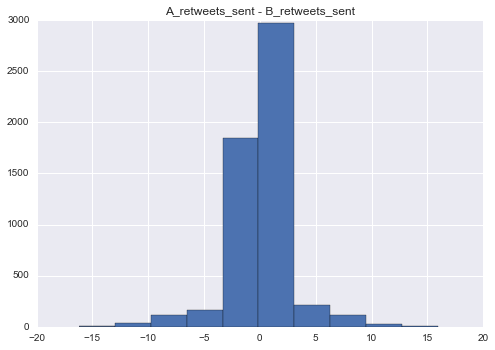

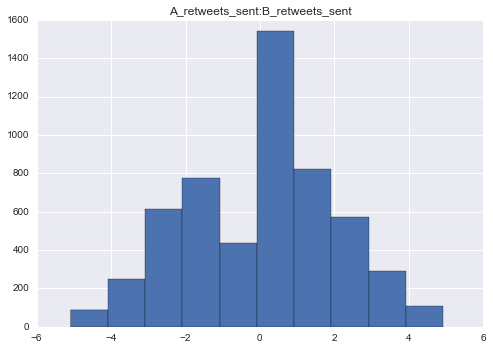

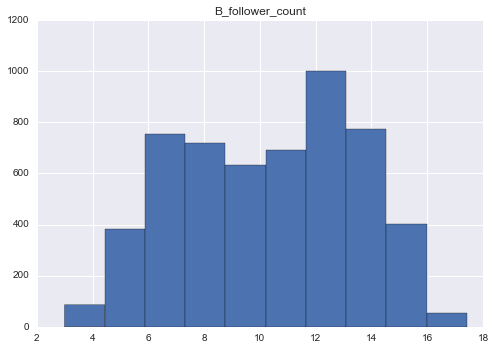

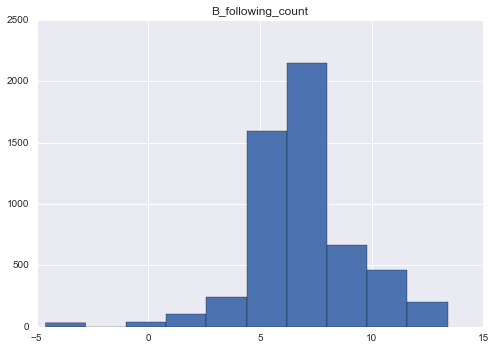

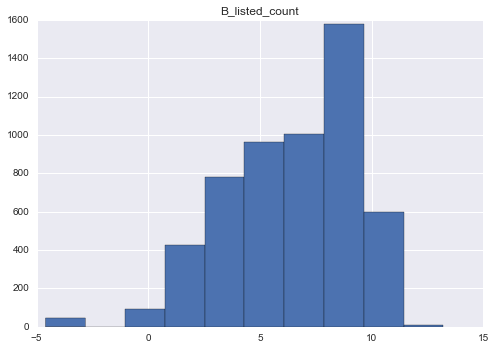

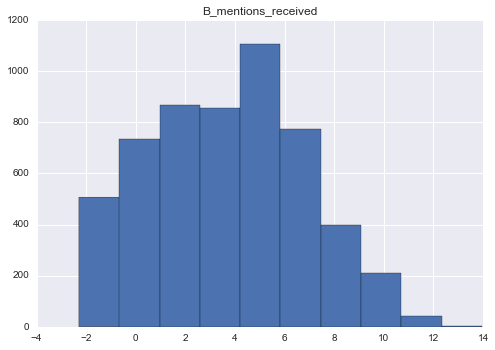

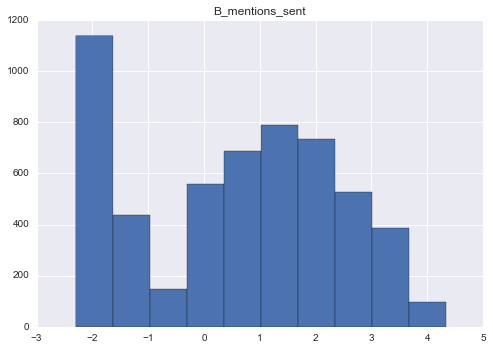

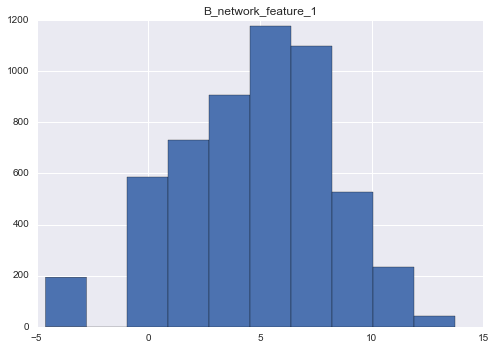

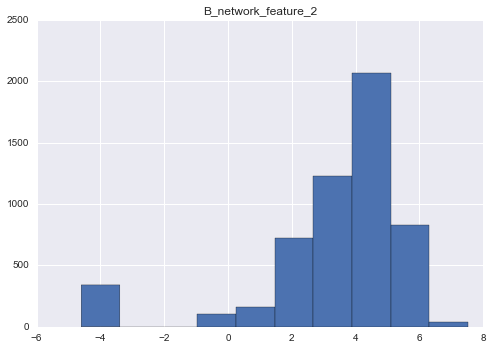

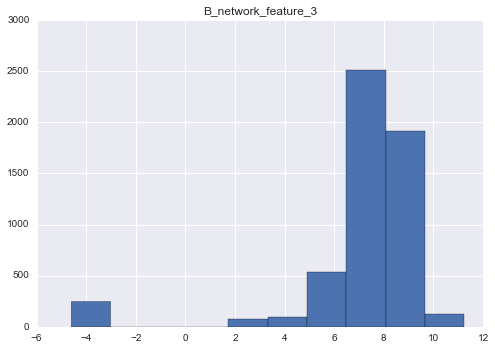

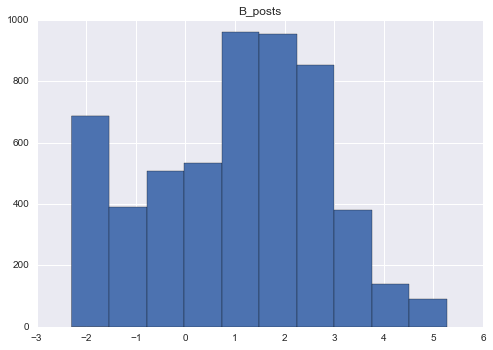

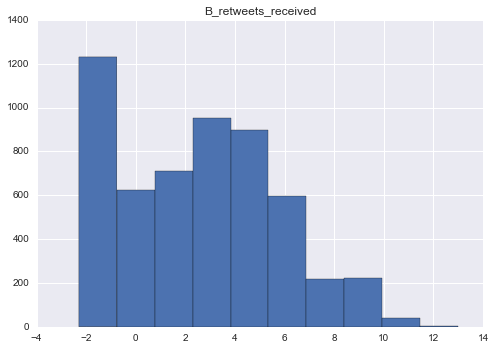

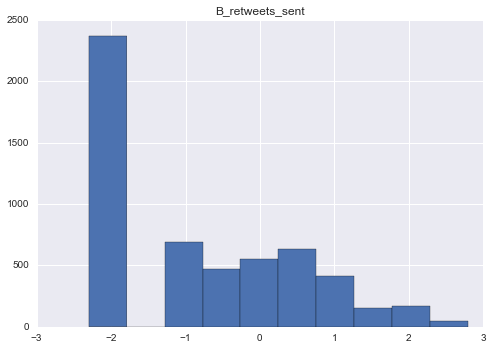

In [8]:
# Plot histograms for each feature
for column in train3.columns:
    train3[column].hist()
    plt.title(column)
    plt.show()

### Standardize data

Finally, let's standardize the data so that each feature has a mean of 0 and a standard deviation of 1.

In [9]:
train4 = (train3 - train3.mean()) / train3.std()
train4['Choice'] = choices

In [10]:
from sklearn.model_selection import train_test_split

X = train4.drop('Choice', axis=1)
y = train4['Choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
def extract_probs(probs_array):
    probs_neg = []
    probs_pos = []
    for row in probs_array:
        probs_neg.append(row[0])
        probs_pos.append(row[1])
    
    return probs_pos, probs_neg

---

# Gradient Boost

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Use cross validation to optimize parameters
## Define paramater grid
param_grid = {'learning_rate': [0.01, .1, 1], 'max_depth': [3, 5, 7]}

## Cross validate, fit to data using optimal paramaters
gb_cv = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10)
gb_cv.fit(X_train, y_train)

print 'Optimal Paramaters:'
print '\tLearning Rate\t:\t{}'.format(gb_cv.best_params_['learning_rate'])
print '\tMax Depth\t:\t{}'.format(gb_cv.best_params_['max_depth'])

Optimal Paramaters:
	Learning Rate	:	0.1
	Max Depth	:	3


In [13]:
# Fit model using optimal parameters
gb = GradientBoostingClassifier(learning_rate=gb_cv.best_params_['learning_rate'], max_depth=gb_cv.best_params_['max_depth'])
gb.fit(X_train, y_train)

# Predict on test set
gb_predict = gb.predict(X_test)

# Extract probabilities for each test observation
gb_probs = gb.predict_proba(X_test)
gb_probsPos, gb_probsNeg = extract_probs(gb_probs)

print 'Prediction Accuracy\t:\t{}%'.format(gb.score(X_test, y_test)*100)

Prediction Accuracy	:	77.8512396694%


### Confusion Matrix

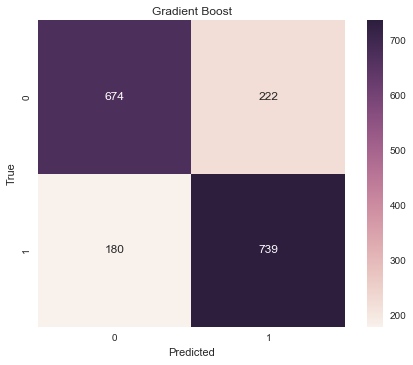

In [14]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, gb_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(gb_predict))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boost')

### Feature Importance

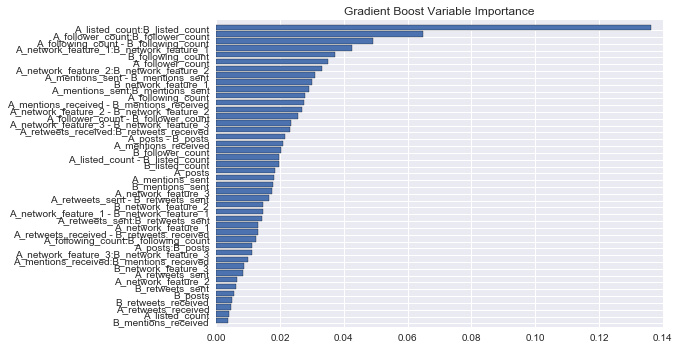

In [15]:
feature_importance = gb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

features = train4.columns[:-1]
gb_features = pd.DataFrame(data = {'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', 
                                                                                                       ascending=False)
gb_features['Gradient Boost Rank'] = range(1,len(features)+1)


plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train[sorted_idx])
plt.title('Gradient Boost Variable Importance')
plt.show()

In [16]:
gb_features.head()

Feature  Importance  Gradient Boost Rank
8             A_listed_count:B_listed_count    0.136202                    1
2         A_follower_count:B_follower_count    0.064911                    2
4     A_following_count - B_following_count    0.049199                    3
17  A_network_feature_1:B_network_feature_1    0.042452                    4
34                        B_following_count    0.037235                    5

---

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

rf_probs = rf.predict_proba(X_test)
rf_probsPos, rf_probsNeg = extract_probs(rf_probs)

print 'Prediction Accuracy\t:\t{}%'.format(rf.score(X_test, y_test)*100)

Prediction Accuracy	:	75.4269972452%


### Confusion Matrix

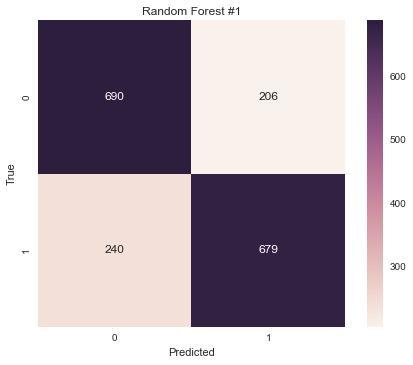

In [18]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, rf_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(rf_predict))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest #1')

### Feature Importance

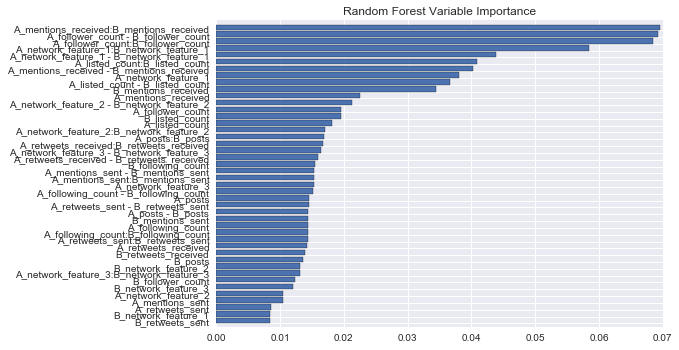

In [19]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

features = train4.columns[:-1]
rf_features = pd.DataFrame(data = {'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', 
                                                                                                       ascending=False)
rf_features['Random Forest Rank'] = range(1,len(features)+1)

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train[sorted_idx])
plt.title('Random Forest Variable Importance')
plt.show()

In [20]:
rf_features.head()

Feature  Importance  Random Forest Rank
11    A_mentions_received:B_mentions_received    0.069530                   1
1         A_follower_count - B_follower_count    0.069307                   2
2           A_follower_count:B_follower_count    0.068455                   3
17    A_network_feature_1:B_network_feature_1    0.058474                   4
16  A_network_feature_1 - B_network_feature_1    0.043859                   5

---

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_predict = logit.predict(X_test)

logit_probs = logit.predict_proba(X_test)
logit_probsPos, logit_probsNeg = extract_probs(logit_probs)

print 'Prediction Accuracy\t:\t{}%'.format(100*logit.score(X_test, y_test))

Prediction Accuracy	:	77.1900826446%


### Confusion Matrix

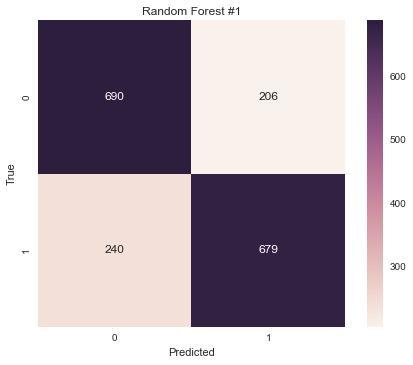

In [22]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, rf_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(rf_predict))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest #1')

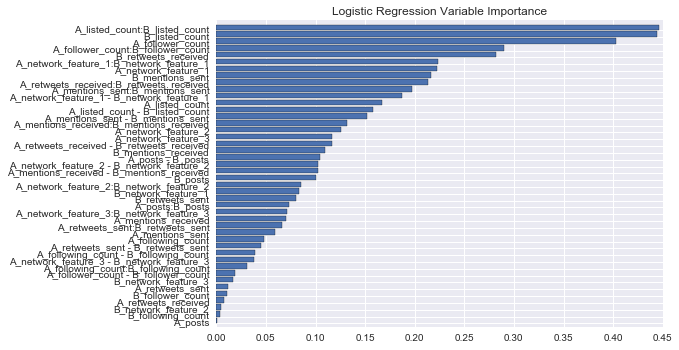

In [23]:
feature_importance = abs(logit.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

features = train4.columns[:-1]
logit_features = pd.DataFrame(data = {'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', 
                                                                                                       ascending=False)
logit_features['Logistic Regression Rank'] = range(1,len(features)+1)

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train[sorted_idx])
plt.title('Logistic Regression Variable Importance')
plt.show()

In [24]:
logit_features.head()

Feature  Importance  Logistic Regression Rank
8       A_listed_count:B_listed_count    0.446676                         1
35                     B_listed_count    0.444388                         2
0                    A_follower_count    0.402828                         3
2   A_follower_count:B_follower_count    0.289899                         4
42                B_retweets_received    0.281778                         5

---

# Aggregate

In [25]:
# Gather predictions from each model for training set
gbTrain_vote = gb.predict(X_train)
rfTrain_vote = rf.predict(X_train)
logitTrain_vote = logit.predict(X_train)

In [26]:
trainDict_vote = {'Gradient Boost': gbTrain_vote, 'Random Forest': rfTrain_vote, 'Logistic Regression': logitTrain_vote}
train_df_vote = pd.DataFrame(trainDict_vote)

testDict_vote = {'Gradient Boost': gb_predict, 'Random Forest': rf_predict, 'Logistic Regressioin': logit_predict}
test_df_vote = pd.DataFrame(testDict_vote)

test_dict = {'Gradien Boost': gb_probsPos, 'Random Forest': rf_probsPos, 'Logistic Regression': logit_probsPos}
test_df = pd.DataFrame(test_dict)

### Method 1: Vote

In [27]:
sums = test_df_vote.sum(axis=1)

votes = []
for sum in sums:
    if sum > 1:
        votes.append(1)
    else:
        votes.append(0)

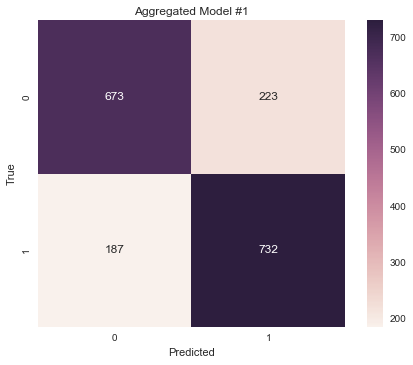

In [28]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, votes)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(votes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Model #1')

In [29]:
print 'Prediction Accuracy\t:\t{}%'.format(100 * float((conf_mat[0,0] + conf_mat[1,1])) / float(conf_mat.sum()))

Prediction Accuracy	:	77.4104683196%


### Method 2: Avg. Prob

In [30]:
avg_probs = test_df.mean(axis=1)

prob_votes = []
for prob in avg_probs:
    if prob > 0.5:
        prob_votes.append(1)
    else:
        prob_votes.append(0)

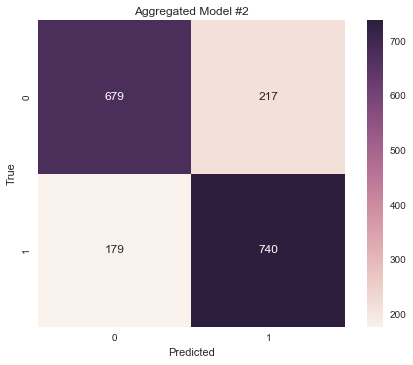

In [31]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, prob_votes)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(prob_votes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Model #2')

In [32]:
print 'Prediction Accuracy\t:\t{}%'.format(100 * float((conf_mat[0,0] + conf_mat[1,1])) / float(conf_mat.sum()))

Prediction Accuracy	:	78.1818181818%


### Method 3: Avg. Prob (Gradient Boost & Logistic Regression Only)

In [33]:
avg_probs = []
for i in range(len(y_test)):
    gb_prob = gb_probsPos[i]
    logit_prob = logit_probsPos[i]
    avg_prob = (gb_prob + logit_prob) / 2
    avg_probs.append(avg_prob)

prob_votes = []
for prob in avg_probs:
    if prob > 0.5:
        prob_votes.append(1)
    else:
        prob_votes.append(0)

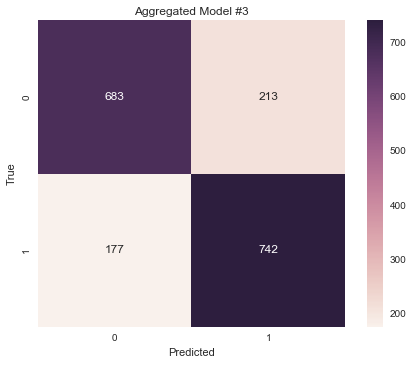

In [34]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, prob_votes)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(prob_votes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Model #3')

In [35]:
print 'Prediction Accuracy\t:\t{}%'.format(100 * float((conf_mat[0,0] + conf_mat[1,1])) / float(conf_mat.sum()))

Prediction Accuracy	:	78.5123966942%


---

# ROC Curve

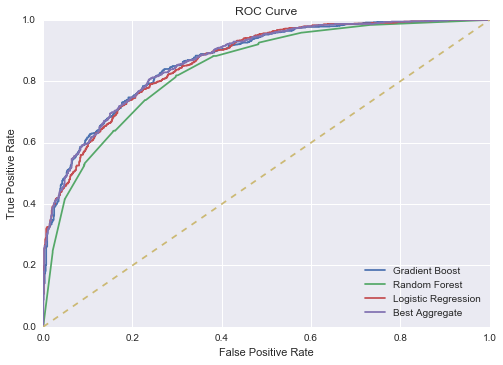

In [36]:
from sklearn.metrics import roc_curve

gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_probsPos, pos_label=1)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probsPos, pos_label=1)
logit_fpr, logit_tpr, logit_thresholds = roc_curve(y_test, logit_probsPos, pos_label=1)

agg2_fpr, agg2_tpr, agg2_thresholds = roc_curve(y_test, avg_probs, pos_label=1)


x = [0,1]
y = [0,1]

plot(gb_fpr, gb_tpr)
plot(rf_fpr, rf_tpr)
plot(logit_fpr, logit_tpr)
plot(agg2_fpr, agg2_tpr)
plot(x,y, ls='--')
title('ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')
legend(['Gradient Boost', 'Random Forest', 'Logistic Regression', 'Best Aggregate'], loc='best')

---

# Results

It appears that our best model is an aggregate between the gradient boost, random forest, and logistic regression. In this model, each individual model gets a vote on whether each observation should be classified as 0 or 1. The model then classifies based on which class received more votes.

In [37]:
feature_ranks = gb_features.merge(rf_features, left_on='Feature', right_on='Feature').drop(['Importance_x', 'Importance_y'], 
                                                                                           axis=1)
feature_ranks = feature_ranks.merge(logit_features, left_on='Feature', right_on='Feature').drop('Importance', axis=1)

feature_ranks['Average Rank'] = feature_ranks.mean(axis=1)

feature_ranks = feature_ranks.sort_values(by='Average Rank').reset_index().drop('index', axis=1)
feature_ranks.head(10)

Feature  Gradient Boost Rank  \
0              A_listed_count:B_listed_count                    1   
1          A_follower_count:B_follower_count                    2   
2    A_network_feature_1:B_network_feature_1                    4   
3                           A_follower_count                    6   
4                             B_listed_count                   21   
5  A_mentions_received - B_mentions_received                   12   
6            A_listed_count - B_listed_count                   20   
7            A_mentions_sent:B_mentions_sent                   10   
8    A_retweets_received:B_retweets_received                   16   
9  A_network_feature_1 - B_network_feature_1                   28   

   Random Forest Rank  Logistic Regression Rank  Average Rank  
0                   6                         1      2.666667  
1                   3                         4      3.000000  
2                   4                         6      4.666667  
3                  13                         3      7.333333  
4                  14                         2     12.333333  
5                   7                        22     13.666667  
6                   9                        13     14.000000  
7                  23                        10     14.333333  
8                  18                         9     14.333333  
9                   5                        11     14.666667